In [70]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [71]:
data = pd.read_csv("fake_or_real_news.csv")

In [72]:
data

,id,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [73]:
data['fake'] = data['label'].apply(lambda x: 0 if x == "REAL" else 1)
data = data.drop("label", axis=1)

In [74]:
X, y = data["text"], data["fake"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

TF-IDF: Term Frequency - Inverse Document Frequency

A metric that indicates how important a word is to a document in a collection. It weighs the improtance of each word in a document based on how often it appears in that document and how often it appears accross all documents in the collection.

TF: Number of times a term t appears in a document
IDF: Logarithm of total number of documents divided by no. of docs that contain term
TF-IDF: TF * IDF

Basically allows us to find the most relevant and distinctive words per document.

In [75]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [76]:
clf = LinearSVC()  # Linear SVC is considered one of the best text classification algorithms
clf.fit(X_train_vectorized, y_train)

LinearSVC()

In [77]:
clf.score(X_test_vectorized, y_test)

0.9368587213891081

In [78]:
article_text = X_test.iloc[10]
vectorized_text = vectorizer.transform([article_text])

In [79]:
clf.predict(vectorized_text)

array([0], dtype=int64)

In [80]:
y_test.iloc[10]

0

In [81]:
# Generate a random index within the range of X_test
random_index = random.randint(0, len(X_test) - 1)

# Select a random article using the generated index
article_text = X_test.iloc[random_index]
vectorized_text = vectorizer.transform([article_text])

# Predict
predicted_value = clf.predict(vectorized_text)[0]

# Actual value
actual_value = y_test.iloc[random_index]

# Comparison and output
if predicted_value == actual_value:
    print("The answer is correct.")
else:
    print("The answer is incorrect.")



The answer is correct.


In [82]:
# Predict for the entire test set
predictions = clf.predict(X_test_vectorized)

# Convert predictions and actual labels to arrays for easier comparison
predictions_array = np.array(predictions)
actual_labels_array = y_test.to_numpy()

# Find indices where predictions and actual labels differ
mismatch_indices = np.where(predictions_array != actual_labels_array)[0]

# Print first 2 mismatches with its index
for index in mismatch_indices[:2]:
    print(f"Index: {index}, Predicted: {predictions_array[index]}, Actual: {actual_labels_array[index]}")
    print(f"Text: {X_test.iloc[index]}\n")


Index: 12, Predicted: 0, Actual: 1
Text: U.S. militia girds for trouble as presidential election nears 11/02/2016 
REUTERS 
Down a Georgia country road, camouflaged members of the Three Percent Security Force have mobilized for rifle practice, hand-to-hand combat training — and an impromptu campaign rally for Republican presidential candidate Donald Trump. 
“How many people are voting for Trump? Ooh-rah!” asks Chris Hill, a paralegal who goes by the code name “Bloodagent.” 
“Ooh-rah!” shout a dozen militia members in response, as morning sunlight sifted through the trees last weekend. 
As the most divisive presidential election in recent memory nears its conclusion, some armed militia groups are preparing for the possibility of a stolen election on Nov. 8 and civil unrest in the days following a victory by Democrat Hillary Clinton. 
They say they won’t fire the first shot, but they’re not planning to leave their guns at home, either. 
Trump’s populist campaign has energized militia mem

In [83]:
# Predict for the entire test set
predictions = clf.predict(X_test_vectorized)

# Convert predictions and actual labels to arrays for easier comparison
predictions_array = np.array(predictions)
actual_labels_array = y_test.to_numpy()

# Initialize lists for false negatives and false positives
false_negatives = []
false_positives = []

# Iterate over the predictions and actual labels
for i in range(len(predictions_array)):
    if predictions_array[i] == 0 and actual_labels_array[i] == 1:
        # False Negative
        false_negatives.append(i)
    elif predictions_array[i] == 1 and actual_labels_array[i] == 0:
        # False Positive
        false_positives.append(i)

In [84]:
# Print False Negatives
print("False Negatives: ACTUALLY FAKE NEWS!!!")
print()
print()
# First 2 False Negatives
for index in false_negatives[:2]:
    print(f"Index: {index}, Text: {X_test.iloc[index]}")
    print()


False Negatives: ACTUALLY FAKE NEWS!!!


Index: 12, Text: U.S. militia girds for trouble as presidential election nears 11/02/2016 
REUTERS 
Down a Georgia country road, camouflaged members of the Three Percent Security Force have mobilized for rifle practice, hand-to-hand combat training — and an impromptu campaign rally for Republican presidential candidate Donald Trump. 
“How many people are voting for Trump? Ooh-rah!” asks Chris Hill, a paralegal who goes by the code name “Bloodagent.” 
“Ooh-rah!” shout a dozen militia members in response, as morning sunlight sifted through the trees last weekend. 
As the most divisive presidential election in recent memory nears its conclusion, some armed militia groups are preparing for the possibility of a stolen election on Nov. 8 and civil unrest in the days following a victory by Democrat Hillary Clinton. 
They say they won’t fire the first shot, but they’re not planning to leave their guns at home, either. 
Trump’s populist campaign has ener

In [85]:
# Print False Positives
print("\nFalse Positives: ACTUALLY REAL NEWS!!!")
print()
print()
# First 2 False Positives
for index in false_positives[:2]:
    print(f"Index: {index}, Text: {X_test.iloc[index]}")
    print()



False Positives: ACTUALLY REAL NEWS!!!


Index: 39, Text: George Washington was the first President of the United States, serving from 1789 to 1797. He also served as commander-in-chief of the Continental Army, and he has the distinction of being the only President unanimously elected by the Electoral College.

The second U.S. President, John Adams, served from 1797 to 1801. He was also the first vice president of the United States, and he was the first President to reside in the White House, moving in on November 1, 1800, while the White House was still under construction.

James Monroe (1817-1825) was the last of the Founding Fathers to be elected President. During his seventh State of the Union address, he outlined a foreign policy that warned European powers against further colonization of or meddling in the Western Hemisphere. This was later known as the Monroe Doctrine.

Andrew Jackson (1829-1837) was the only President to serve in both the American Revolution and the War of 181

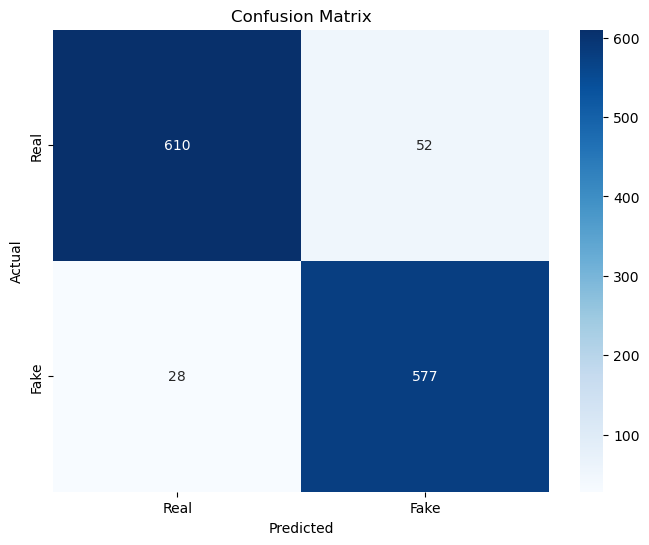

In [86]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plotting using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
